Name =  "Dheric Seney"

# UFC Statistics for Training 

https://www.itbusiness.ca/news/former-ufc-fighter-says-data-analytics-should-be-used-in-mma/77375

Data Analytics is not used a lot in UFC. Most fighters are training for their strengths and not necessary to defeat their opponent. Using Data Science / Data Analytics, fighters could train certain styles / techniques in order to get an upper hand against their opponent

Objective: Based on the fighters who will be fighting in UFC: 236, I will analyze each fighter's past fights and predict what they will do in the incoming PPV event

The Data set that was retrieved for this project was from http://ufcstats.com/statistics/events/completed
The data includeds:
    - 10 fighters fighting in the Main Card of UFC 236
    - 5 rounds of Data
        - if the fight did not last 5 rounds because it was a 3 round fight or a fighter was KO'd or submitted, 0's were placed for the rounds
    - Attempts of Significant Strikes (Head, body, leg, distance, ground, clinch)
    - Lands of Significant Stikes (Head, body, leg, distance, ground, clinch)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = pd.read_csv('UFC_Rounds(extra).csv')

In [2]:
# set up csv file to jupyter and checks to see if there is stuff

print(file.columns)
# print(file.tail(17))
# print(pd.DataFrame(file))
# file.iloc[49:]

Index(['Date', 'Name', 'Oponnent', 'R1_Head_Attempts', 'R1_Head_Landed',
       'R1_Body_Attempts', 'R1_Body_Landed', 'R1_Leg_Attempts',
       'R1_Leg_Laneded', 'R1_Distance_Attempts', 'R1_Distance_Landed',
       'R1_Clinch_Attemtps', 'R1_Clinch_Landed', 'R1_Ground_Attempts',
       'R1_Ground_Landed', 'R2_Head_Attempts', 'R2_Head_Landed',
       'R2_Body_Attempts', 'R2_Body_Landed', 'R2_Leg_Attempts',
       'R2_Leg_Laneded', 'R2_Distance_Attempts', 'R2_Distance_Landed',
       'R2_Clinch_Attemtps', 'R2_Clinch_Landed', 'R2_Ground_Attempts',
       'R2_Ground_Landed', 'R3_Head_Attempts', 'R3_Head_Landed',
       'R3_Body_Attempts', 'R3_Body_Landed', 'R3_Leg_Attempts',
       'R3_Leg_Laneded', 'R3_Distance_Attempts', 'R3_Distance_Landed',
       'R3_Clinch_Attemtps', 'R3_Clinch_Landed', 'R3_Ground_Attempts',
       'R3_Ground_Landed', 'R4_Head_Attempts', 'R4_Head_Landed',
       'R4_Body_Attempts', 'R4_Body_Landed', 'R4_Leg_Attempts',
       'R4_Leg_Laneded', 'R4_Distance_Attempts', '

In [3]:
# file = file.drop(file.iloc[49:],axis=0)
file = file[:-17]
print(file)


          Date                 Name                Oponnent  R1_Head_Attempts  \
0    2/19/2019      Israel Adesanya          Anderson Silva              31.0   
1    11/3/2018      Israel Adesanya           Derek Brunson              11.0   
2     7/6/2018      Israel Adesanya            Brad Tavares              21.0   
3    4/14/2018      Israel Adesanya          Marvin Vettori              29.0   
4    2/10/2018      Israel Adesanya           Rob Wilkinson               8.0   
5    12/8/2018          Eryk Anders         Elias Theodorou              19.0   
6    9/22/2018          Eryk Anders           Thiago Santos              13.0   
7    8/25/2018          Eryk Anders            Tim Williams               8.0   
8     2/3/2018          Eryk Anders           Lyoto Machida               4.0   
9    12/9/2017          Eryk Anders            Markus Perez              21.0   
10   7/22/2017          Eryk Anders            Rafael Natal              28.0   
11  11/17/2018  Khalil Rount

# Main Card

The main card: (wins-losses-draws)

    Max Holloway (20 - 3 - 0) vs Dustin Poirier (24-5-0)
    Kelvin Gastelum (16-3-0) vs Israel Adesanya (16-0-0)
    Eryk Anders (11-3-0) vs Khalil Rountree Jr. (7-3-0)
    Alan Jouban (16-6-0) vs Dwight Grant (9-2-0)
    Ovince Saint Preux (23-12-0) vs Nikita Krylov (24-6-0)



getFighterStats() takes an input of the fighter name and the file name. It returns a list/ dataframe of the previous fights the fighter was in and the stats from them

In [4]:
def getFighterStats(name,file):
    fighter = file[file['Name'] == name]
    return fighter


In [5]:
# Set's tables for each fighter

Holloway = getFighterStats('Max Holloway', file)
Poirier = getFighterStats('Dustin Poirier', file)

Gastelum = getFighterStats('Kelvin Gastelum',file)
Adesanya = getFighterStats('Israel Adesanya',file) 

Anders = getFighterStats('Eryk Anders',file) 
RountreeJr = getFighterStats('Khalil Rountree Jr.',file)

Jouban = getFighterStats('Alan Jouban',file)
Grant = getFighterStats('Dwight Grant',file) 

Preux = getFighterStats('Saint Preux',file)
Krylov = getFighterStats('Nikita Krylov',file)


In [6]:
print(Holloway)
print(Poirier)
print(Gastelum)
print(Adesanya)
print(Anders)
print(RountreeJr)
print(Jouban)
print(Grant)
print(Preux)
print(Krylov)
# type(Poirier)

          Date          Name         Oponnent  R1_Head_Attempts  \
19   12/8/2018  Max Holloway     Brian Ortega              70.0   
20   12/2/2017  Max Holloway        Jose Aldo              83.0   
21  12/10/2016  Max Holloway   Anthony Pettis              36.0   
22    6/4/2016  Max Holloway    Ricardo Lamas              38.0   
23  12/12/2015  Max Holloway  Jeremy Stephens              19.0   

    R1_Head_Landed  R1_Body_Attempts  R1_Body_Landed  R1_Leg_Attempts  \
19            30.0              14.0            10.0              0.0   
20            20.0               5.0             4.0              1.0   
21            11.0               8.0             2.0             14.0   
22            17.0               4.0             4.0              6.0   
23             9.0               8.0             4.0              2.0   

    R1_Leg_Laneded  R1_Distance_Attempts        ...         R5_Body_Attempts  \
19             0.0                  83.0        ...                      0.0  

          Date          Name         Oponnent  R1_Head_Attempts  \
17   2/23/2019  Dwight Grant  Carlo Pedersoli              47.0   
18  12/15/2018  Dwight Grant        Zak Ottow              26.0   

    R1_Head_Landed  R1_Body_Attempts  R1_Body_Landed  R1_Leg_Attempts  \
17            14.0               2.0             2.0              4.0   
18             4.0               2.0             2.0              1.0   

    R1_Leg_Laneded  R1_Distance_Attempts        ...         R5_Body_Attempts  \
17             4.0                  44.0        ...                      0.0   
18             1.0                  28.0        ...                      0.0   

    R5_Body_Landed  R5_Leg_Attempts  R5_Leg_Laneded  R5_Distance_Attempts  \
17             0.0              0.0             0.0                   0.0   
18             0.0              0.0             0.0                   0.0   

    R5_Distance_Landed  R5_Clinch_Attemtps  R5_Clinch_Landed  \
17                 0.0                 0.

GetRoundStats() 
    - Input: takes two inputts: he fighter's previous fights and stats variable created from getFighterStats() and the specific round that you want the stats for
    - Purpose: Takes the mean for each column so its one row
    - Output: outputs the row of stats for the specified round

In [7]:
def getRoundStats(name,r):
        if r == 1:
            roundOne = name[name.columns[3:15]]
            stats1 = np.mean(roundOne)
            return pd.DataFrame(stats1)
        elif r == 2:
            roundTwo = name[name.columns[15:27]]
            stats2 = np.mean(roundTwo)
            return pd.DataFrame(stats2)
        elif r == 3:
            roundThree = name[name.columns[27:39]]
            stats3 = np.mean(roundThree)
            return pd.DataFrame(stats3)
        elif r == 4:
            roundFour = name[name.columns[39:51]]
            stats4 = np.mean(roundFour)
            return pd.DataFrame(stats4)
        elif r == 5:
            roundFive = name[name.columns[51::]]
            stats5 = np.mean(roundFive)
            return pd.DataFrame(stats5)
        else:
            return 'choose a round between 1 to 5'

category()
    - input: Takes two variables. The name of the Fighter and the specific stat needed 
            - n = normal
            - d = distance
            - c = clinch
            - g = ground
    - Purpose: takes the sum of the columns for the specific categorical stat needed. The calculation is done on landed not attempts
    - Output: returns the total number for the categorical stat

In [8]:
def category(name,stat):
    if stat == 'n':
        return np.sum(name[0][1:6:2]).round(1)
    elif stat == 'd':
        return np.sum(name[0][7:8:2])
    elif stat == 'c':
        return np.sum(name[0][9:10:2])
    elif stat == 'g':
        return np.sum(name[0][11::2])
    else:
        return 'wrong stat'
        

In [9]:
H_stats = getRoundStats(Holloway,3)
print(H_stats)
# H_stats[0][9:11:2]
category(H_stats,'g')

# clinch = getClinch(H_stats,1)
# print("total", clinch)
# distance = getDistance(H_stats,1)
# print("total", distance)
# ground = getGround(H_stats,1)
# print("total", ground,)
# normal = getNormal(H_stats,1)
# print("total", normal)

                         0
R3_Head_Attempts      85.8
R3_Head_Landed        41.6
R3_Body_Attempts      11.2
R3_Body_Landed         9.4
R3_Leg_Attempts        2.4
R3_Leg_Laneded         2.0
R3_Distance_Attempts  86.6
R3_Distance_Landed    43.2
R3_Clinch_Attemtps     6.2
R3_Clinch_Landed       5.2
R3_Ground_Attempts     6.6
R3_Ground_Landed       4.6


4.6

In [10]:
# labels = 'Clinch','Distance','Ground','Normal'
# sizes = [getClinch(getRoundStats(Holloway,1),1), getDistance(getRoundStats(Holloway,1),1), getGround(getRoundStats(Holloway,1),1), getNormal(getRoundStats(Holloway,1),1)]
# colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
# explode = (0, 0, 0, 0) 
 
# # Plot
# plt.pie(sizes, explode=explode, labels=labels, colors=colors,
# autopct='%1.1f%%', shadow=True, startangle=140)
 
# plt.axis('equal')
# plt.show()

# Stats per round

This section finds specific stats per each fighter per round. After getting the stats, the stats are placed in a pie chart so a fighter can use this data to know what their opponent is most likely going to do.

The rounds calculated are rounds 1, 2, 3. Rounds 4 and 5 were left out due to not all fighters making it to 5 rounds.

# Round 1

Max Holloway (20 - 3 - 0) vs Dustin Poirier (24-5-0) : Round 1

<function matplotlib.pyplot.show(*args, **kw)>

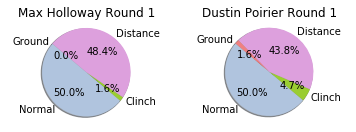

In [11]:
plt.subplot(221)
plt.title('Max Holloway Round 1')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Holloway,1),'n'),category(getRoundStats(Holloway,1),'c'),category(getRoundStats(Holloway,1),'d'),category(getRoundStats(Holloway,1),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Dustin Poirier Round 1')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Poirier,1),'n'),category(getRoundStats(Poirier,1),'c'),category(getRoundStats(Poirier ,1),'d'),category(getRoundStats(Poirier ,1),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Kelvin Gastelum (16-3-0) vs Israel Adesanya (16-0-0) : Round 1

<function matplotlib.pyplot.show(*args, **kw)>

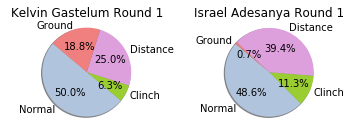

In [12]:
plt.subplot(221)
plt.title('Kelvin Gastelum Round 1')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Gastelum,1),'n'),category(getRoundStats(Gastelum,1),'c'),category(getRoundStats(Gastelum,1),'d'),category(getRoundStats(Gastelum,1),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Israel Adesanya Round 1')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Adesanya ,1),'n'),category(getRoundStats(Adesanya ,1),'c'),category(getRoundStats(Adesanya ,1),'d'),category(getRoundStats(Adesanya,1),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Eryk Anders (11-3-0) vs Khalil Rountree Jr. (7-3-0) : Round 1

<function matplotlib.pyplot.show(*args, **kw)>

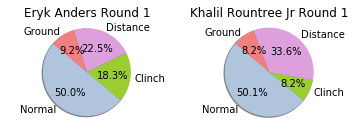

In [13]:
plt.subplot(221)
plt.title('Eryk Anders Round 1')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Anders,1),'n'),category(getRoundStats(Anders,1),'c'),category(getRoundStats(Anders,1),'d'),category(getRoundStats(Anders,1),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Khalil Rountree Jr Round 1')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(RountreeJr,1),'n'),category(getRoundStats(RountreeJr,1),'c'),category(getRoundStats(RountreeJr,1),'d'),category(getRoundStats(RountreeJr ,1),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Alan Jouban (16-6-0) vs Dwight Grant (9-2-0) : Round 1

<function matplotlib.pyplot.show(*args, **kw)>

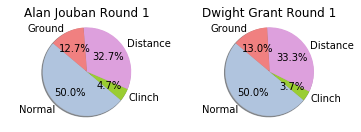

In [14]:
plt.subplot(221)
plt.title('Alan Jouban Round 1')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Jouban,1),'n'),category(getRoundStats(Jouban,1),'c'),category(getRoundStats(Jouban,1),'d'),category(getRoundStats(Jouban,1),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Dwight Grant Round 1')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Grant,1),'n'),category(getRoundStats(Grant,1),'c'),category(getRoundStats(Grant,1),'d'),category(getRoundStats(Grant,1),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Ovince Saint Preux (23-12-0) vs Nikita Krylov (24-6-0) : Round 1

<function matplotlib.pyplot.show(*args, **kw)>

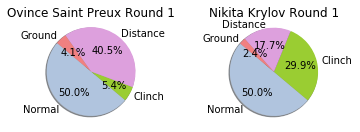

In [15]:
plt.subplot(221)
plt.title('Ovince Saint Preux Round 1')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Preux,1),'n'),category(getRoundStats(Preux,1),'c'),category(getRoundStats(Preux,1),'d'),category(getRoundStats(Preux,1),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Nikita Krylov Round 1')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Krylov,1),'n'),category(getRoundStats(Krylov,1),'d'),category(getRoundStats(Krylov,1),'c'),category(getRoundStats(Krylov,1),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

# Round 2

Max Holloway (20 - 3 - 0) vs Dustin Poirier (24-5-0) : Round 2

<function matplotlib.pyplot.show(*args, **kw)>

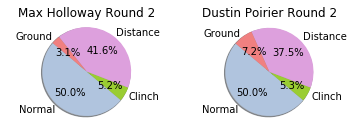

In [16]:
plt.subplot(221)
plt.title('Max Holloway Round 2')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Holloway,2),'n'),category(getRoundStats(Holloway,2),'c'),category(getRoundStats(Holloway,2),'d'),category(getRoundStats(Holloway,2),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Dustin Poirier Round 2')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Poirier,2),'n'),category(getRoundStats(Poirier,2),'c'),category(getRoundStats(Poirier ,2),'d'),category(getRoundStats(Poirier ,2),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Kelvin Gastelum (16-3-0) vs Israel Adesanya (16-0-0) : Round 2

<function matplotlib.pyplot.show(*args, **kw)>

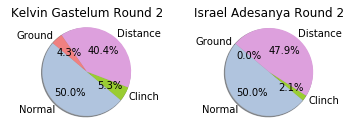

In [17]:
plt.subplot(221)
plt.title('Kelvin Gastelum Round 2')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Gastelum,2),'n'),category(getRoundStats(Gastelum,2),'c'),category(getRoundStats(Gastelum,2),'d'),category(getRoundStats(Gastelum,2),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Israel Adesanya Round 2')
labels ='Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Adesanya ,2),'n'),category(getRoundStats(Adesanya ,2),'c'),category(getRoundStats(Adesanya ,2),'d'),category(getRoundStats(Adesanya,2),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Eryk Anders (11-3-0) vs Khalil Rountree Jr. (7-3-0) : Round 2

<function matplotlib.pyplot.show(*args, **kw)>

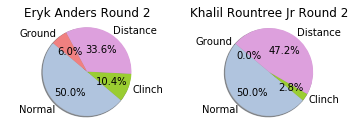

In [18]:
plt.subplot(221)
plt.title('Eryk Anders Round 2')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Anders,2),'n'),category(getRoundStats(Anders,2),'c'),category(getRoundStats(Anders,2),'d'),category(getRoundStats(Anders,2),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Khalil Rountree Jr Round 2')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(RountreeJr,2),'n'),category(getRoundStats(RountreeJr,2),'c'),category(getRoundStats(RountreeJr,2),'d'),category(getRoundStats(RountreeJr ,2),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Alan Jouban (16-6-0) vs Dwight Grant (9-2-0) : Round 2

<function matplotlib.pyplot.show(*args, **kw)>

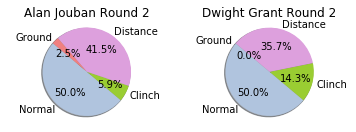

In [19]:
plt.subplot(221)
plt.title('Alan Jouban Round 2')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Jouban,2),'n'),category(getRoundStats(Jouban,2),'c'),category(getRoundStats(Jouban,2),'d'),category(getRoundStats(Jouban,2),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Dwight Grant Round 2')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Grant,2),'n'),category(getRoundStats(Grant,2),'c'),category(getRoundStats(Grant,2),'d'),category(getRoundStats(Grant,2),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Ovince Saint Preux (23-12-0) vs Nikita Krylov (24-6-0) : Round 2

<function matplotlib.pyplot.show(*args, **kw)>

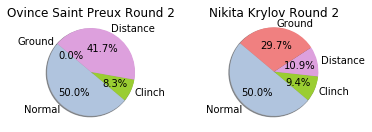

In [20]:
plt.subplot(221)
plt.title('Ovince Saint Preux Round 2')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Preux,2),'n'),category(getRoundStats(Preux,2),'c'),category(getRoundStats(Preux,2),'d'),category(getRoundStats(Preux,2),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Nikita Krylov Round 2')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Krylov,2),'n'),category(getRoundStats(Krylov,2),'c'),category(getRoundStats(Krylov,2),'d'),category(getRoundStats(Krylov,2),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

# Round 3

Max Holloway (20 - 3 - 0) vs Dustin Poirier (24-5-0) : Round 3

<function matplotlib.pyplot.show(*args, **kw)>

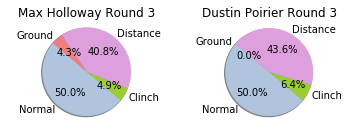

In [21]:
plt.subplot(221)
plt.title('Max Holloway Round 3')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Holloway,3),'n'),category(getRoundStats(Holloway,3),'c'),category(getRoundStats(Holloway,3),'d'),category(getRoundStats(Holloway,3),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Dustin Poirier Round 3')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Poirier,3),'n'),category(getRoundStats(Poirier,3),'c'),category(getRoundStats(Poirier ,3),'d'),category(getRoundStats(Poirier ,3),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Kelvin Gastelum (16-3-0) vs Israel Adesanya (16-0-0) : Round 3

<function matplotlib.pyplot.show(*args, **kw)>

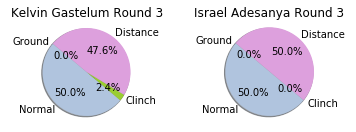

In [22]:
plt.subplot(221)
plt.title('Kelvin Gastelum Round 3')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Gastelum,3),'n'),category(getRoundStats(Gastelum,3),'c'),category(getRoundStats(Gastelum,3),'d'),category(getRoundStats(Gastelum,3),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Israel Adesanya Round 3')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Adesanya ,3),'n'),category(getRoundStats(Adesanya ,3),'c'),category(getRoundStats(Adesanya ,3),'d'),category(getRoundStats(Adesanya,3),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Eryk Anders (11-3-0) vs Khalil Rountree Jr. (7-3-0) : Round 3

<function matplotlib.pyplot.show(*args, **kw)>

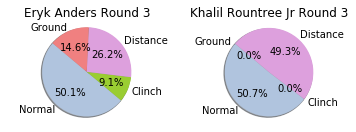

In [23]:
plt.subplot(221)
plt.title('Eryk Anders Round 3')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Anders,3),'n'),category(getRoundStats(Anders,3),'c'),category(getRoundStats(Anders,3),'d'),category(getRoundStats(Anders,3),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Khalil Rountree Jr Round 3')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(RountreeJr,3),'n'),category(getRoundStats(RountreeJr,3),'c'),category(getRoundStats(RountreeJr,3),'d'),category(getRoundStats(RountreeJr ,3),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Alan Jouban (16-6-0) vs Dwight Grant (9-2-0) : Round 3

<function matplotlib.pyplot.show(*args, **kw)>

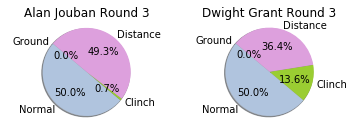

In [24]:
plt.subplot(221)
plt.title('Alan Jouban Round 3')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Jouban,3),'n'),category(getRoundStats(Jouban,3),'c'),category(getRoundStats(Jouban,3),'d'),category(getRoundStats(Jouban,3),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Dwight Grant Round 3')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Grant,3),'n'),category(getRoundStats(Grant,3),'c'),category(getRoundStats(Grant,3),'d'),category(getRoundStats(Grant,3),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Ovince Saint Preux (23-12-0) vs Nikita Krylov (24-6-0) : Round 3

<function matplotlib.pyplot.show(*args, **kw)>

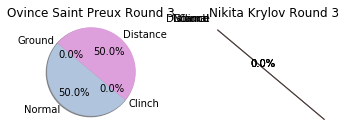

In [25]:
plt.subplot(221)
plt.title('Ovince Saint Preux Round 3')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Preux,3),'n'),category(getRoundStats(Preux,3),'c'),category(getRoundStats(Preux,3),'d'),category(getRoundStats(Preux,3),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Nikita Krylov Round 3')
labels = 'Normal', 'Clinch','Distance','Ground'
sizes = [category(getRoundStats(Krylov,3),'n'),category(getRoundStats(Krylov,3),'c'),category(getRoundStats(Krylov,3),'d'),category(getRoundStats(Krylov,3),'g')]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

# Totals

Instead of getting statistics per round. Totals sums up all the stats per round to make the data into one. Once the data is gathered, More pie charts are made for comparison between opponents

In [26]:
# Holloway
HNormal = (category(getRoundStats(Holloway,1),'n') + category(getRoundStats(Holloway,2),'n') + category(getRoundStats(Holloway,3),'n')).round(1)
HDistance =  (category(getRoundStats(Holloway,1),'d') + category(getRoundStats(Holloway,2),'d') + category(getRoundStats(Holloway,3),'d')).round(1)
HClinch =  (category(getRoundStats(Holloway,1),'c') + category(getRoundStats(Holloway,2),'c') + category(getRoundStats(Holloway,3),'c')).round(1)
HGround =  (category(getRoundStats(Holloway,1),'g') + category(getRoundStats(Holloway,2),'g') + category(getRoundStats(Holloway,3),'g')).round(1)

print(HNormal,HDistance,HClinch,HGround)


# Poirier
PNormal = (category(getRoundStats(Poirier,1),'n') + category(getRoundStats(Poirier,2),'n') + category(getRoundStats(Poirier ,3),'n')).round(1)
PDistance = (category(getRoundStats(Poirier,1),'d') + category(getRoundStats(Poirier,2),'d') + category(getRoundStats(Poirier ,3),'d')).round(1)
PClinch = (category(getRoundStats(Poirier,1),'c') + category(getRoundStats(Poirier,2),'c') + category(getRoundStats(Poirier ,3),'c')).round(1)
PGround = (category(getRoundStats(Poirier,1),'g') + category(getRoundStats(Poirier,2),'g') + category(getRoundStats(Poirier ,3),'g')).round(1)

print(PNormal,PDistance,PClinch,PGround)

# Gastelum
GNormal = (category(getRoundStats(Gastelum,1),'n') + category(getRoundStats(Gastelum,2),'n') + category(getRoundStats(Gastelum,3),'n')).round(1)
GDistance = (category(getRoundStats(Gastelum,1),'d') + category(getRoundStats(Gastelum,2),'d') + category(getRoundStats(Gastelum,3),'d')).round(1)
GClinch = (category(getRoundStats(Gastelum,1),'c') + category(getRoundStats(Gastelum,2),'c') + category(getRoundStats(Gastelum,3),'c')).round(1)
GGround = (category(getRoundStats(Gastelum,1),'g') + category(getRoundStats(Gastelum,2),'g') + category(getRoundStats(Gastelum,3),'g')).round(1)

# Adesanya
ANormal = (category(getRoundStats(Adesanya ,1),'n') + category(getRoundStats(Adesanya ,2),'n') + category(getRoundStats(Adesanya ,3),'n')).round(1)
ADistance = (category(getRoundStats(Adesanya ,1),'d') + category(getRoundStats(Adesanya ,2),'d') + category(getRoundStats(Adesanya ,3),'d')).round(1)
AClinch = (category(getRoundStats(Adesanya ,1),'c') + category(getRoundStats(Adesanya ,2),'c') + category(getRoundStats(Adesanya ,3),'c')).round(1)
AGround = (category(getRoundStats(Adesanya ,1),'g') + category(getRoundStats(Adesanya ,2),'g') + category(getRoundStats(Adesanya ,3),'g')).round(1)

print(ANormal,ADistance,AClinch,AGround)

# Anders
AnNormal = (category(getRoundStats(Anders,1),'n') + category(getRoundStats(Anders,2),'n') + category(getRoundStats(Anders,3),'n')).round(1)
AnDistance = (category(getRoundStats(Anders,1),'d') + category(getRoundStats(Anders,2),'d') + category(getRoundStats(Anders,3),'d')).round(1)
AnClinch = (category(getRoundStats(Anders,1),'c') + category(getRoundStats(Anders,2),'c') + category(getRoundStats(Anders,3),'c')).round(1)
AnGround = (category(getRoundStats(Anders,1),'g') + category(getRoundStats(Anders,2),'g') + category(getRoundStats(Anders,3),'g')).round(1)

print(AnNormal,AnDistance,AnClinch,AnGround)

# RountreeJr
RNormal = (category(getRoundStats(RountreeJr,1),'n') + category(getRoundStats(RountreeJr,2),'n') + category(getRoundStats(RountreeJr,3),'n')).round(1)
RDistance = (category(getRoundStats(RountreeJr,1),'d') + category(getRoundStats(RountreeJr,2),'d') + category(getRoundStats(RountreeJr,3),'d')).round(1)
RClinch = (category(getRoundStats(RountreeJr,1),'c') + category(getRoundStats(RountreeJr,2),'c') + category(getRoundStats(RountreeJr,3),'c')).round(1)
RGround = (category(getRoundStats(RountreeJr,1),'g') + category(getRoundStats(RountreeJr,2),'g') + category(getRoundStats(RountreeJr,3),'g')).round(1)

print(RNormal,RDistance,RClinch,RGround)

# Jouban
JNormal = (category(getRoundStats(Jouban,1),'n') + category(getRoundStats(Jouban,2),'n') + category(getRoundStats(Jouban,3),'n')).round(1)
JDistance = (category(getRoundStats(Jouban,1),'d') + category(getRoundStats(Jouban,2),'d') + category(getRoundStats(Jouban,3),'d')).round(1)
JClinch = (category(getRoundStats(Jouban,1),'c') + category(getRoundStats(Jouban,2),'c') + category(getRoundStats(Jouban,3),'c')).round(1)
JGround = (category(getRoundStats(Jouban,1),'g') + category(getRoundStats(Jouban,2),'g') + category(getRoundStats(Jouban,3),'g')).round(1)

print(JNormal,JDistance,JClinch,JGround)

# Grant
GrNormal = (category(getRoundStats(Grant,1),'n') + category(getRoundStats(Grant,2),'n') + category(getRoundStats(Grant,3),'n')).round(1)
GrDistance = (category(getRoundStats(Grant,1),'d') + category(getRoundStats(Grant,2),'d') + category(getRoundStats(Grant,3),'d')).round(1)
GrClinch = (category(getRoundStats(Grant,1),'c') + category(getRoundStats(Grant,2),'c') + category(getRoundStats(Grant,3),'c')).round(1)
GrGround = (category(getRoundStats(Grant,1),'g') + category(getRoundStats(Grant,2),'g') + category(getRoundStats(Grant,3),'g')).round(1)

print(PNormal,PDistance,PClinch,PGround)

# Preux 
PrNormal = (category(getRoundStats(Preux,1),'n') + category(getRoundStats(Preux,2),'n') + category(getRoundStats(Preux,3),'n')).round(1)
PrDistance = (category(getRoundStats(Preux,1),'d') + category(getRoundStats(Preux,2),'d') + category(getRoundStats(Preux,3),'d')).round(1)
PrClinch = (category(getRoundStats(Preux,1),'c') + category(getRoundStats(Preux,2),'c') + category(getRoundStats(Preux,3),'c')).round(1)
PrGround = (category(getRoundStats(Preux,1),'g') + category(getRoundStats(Preux,2),'g') + category(getRoundStats(Preux,3),'g')).round(1)

print(PrNormal,PrDistance,PrClinch,PrGround)

# Krylov 
KNormal = (category(getRoundStats(Krylov,1),'n') + category(getRoundStats(Krylov,2),'n') + category(getRoundStats(Krylov,3),'n')).round(1)
KDistance = (category(getRoundStats(Krylov,1),'d') + category(getRoundStats(Krylov,2),'d') + category(getRoundStats(Krylov,3),'d')).round(1)
KClinch = (category(getRoundStats(Krylov,1),'c') + category(getRoundStats(Krylov,2),'c') + category(getRoundStats(Krylov,3),'c')).round(1)
KGround = (category(getRoundStats(Krylov,1),'g') + category(getRoundStats(Krylov,2),'g') + category(getRoundStats(Krylov,3),'g')).round(1)

print(KNormal,KDistance,KClinch,KGround)

116.8 99.8 10.0 7.0
72.0 59.0 7.4 5.6
37.2 34.0 3.8 0.2
43.0 24.7 10.2 8.2
17.4 13.7 2.0 1.7
40.2 32.8 3.0 4.4
72.0 59.0 7.4 5.6
15.0 13.0 1.4 0.6
31.8 16.6 10.2 5.0


Max Holloway (20 - 3 - 0) vs Dustin Poirier (24-5-0) : Total

<function matplotlib.pyplot.show(*args, **kw)>

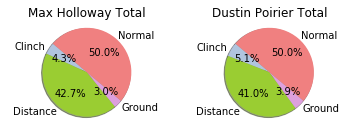

In [27]:
plt.subplot(221)
plt.title('Max Holloway Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [HClinch,HDistance,HGround,HNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Dustin Poirier Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [PClinch,PDistance,PGround,PNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Kelvin Gastelum (16-3-0) vs Israel Adesanya (16-0-0) : Total

<function matplotlib.pyplot.show(*args, **kw)>

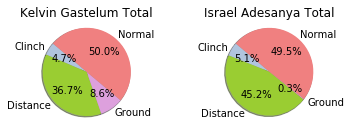

In [28]:
plt.subplot(221)
plt.title('Kelvin Gastelum Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [GClinch, GDistance, GGround, GNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Israel Adesanya Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [AClinch, ADistance, AGround, ANormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Eryk Anders (11-3-0) vs Khalil Rountree Jr. (7-3-0) : Total

<function matplotlib.pyplot.show(*args, **kw)>

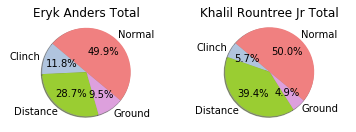

In [29]:
plt.subplot(221)
plt.title('Eryk Anders Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [AnClinch, AnDistance, AnGround, AnNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Khalil Rountree Jr Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [RClinch, RDistance, RGround, RNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Alan Jouban (16-6-0) vs Dwight Grant (9-2-0) : Total

<function matplotlib.pyplot.show(*args, **kw)>

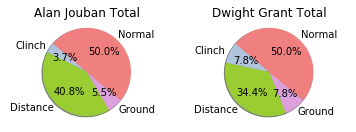

In [30]:
plt.subplot(221)
plt.title('Alan Jouban Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [JClinch, JDistance, JGround, JNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Dwight Grant Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [GrClinch, GrDistance, GrGround, GrNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Ovince Saint Preux (23-12-0) vs Nikita Krylov (24-6-0) ; Total

<function matplotlib.pyplot.show(*args, **kw)>

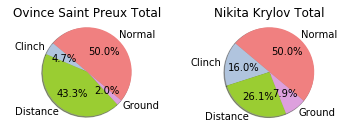

In [31]:
plt.subplot(221)
plt.title('Ovince Saint Preux Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [PrClinch, PrDistance, PrGround, PrNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Nikita Krylov Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [KClinch, KDistance, KGround, KNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

# Results

On April 13th, UFC 236 took place. The data from the fights were recorded into an alike table to the first table that was used. With the data, the same process was made by creating pie charts using the data.

In [32]:
results = pd.read_csv('UFC_Winenrs.csv')
# print(results.columns)
print(results)
results = results.drop([10], axis = 0)
print(results)

         Date                 Name             Oponnent  R1_Head_Attempts  \
0   4/13/2019         Max Holloway       Dustin Poirier              69.0   
1   4/13/2019       Dustin Poirier         Max Holloway             105.0   
2   4/13/2019      Israel Adesanya      Kelvin Gastelum              22.0   
3   4/13/2019      Kelvin Gastelum      Israel Adesanya              28.0   
4   4/13/2019          Eryk Anders  Khalil Rountree Jr.              12.0   
5   4/13/2019  Khalil Rountree Jr.          Eryk Anders              16.0   
6   4/13/2019          Alan Jouban         Dwight Grant              26.0   
7   4/13/2019         Dwight Grant          Alan Jouban              28.0   
8   4/13/2019          Saint Preux        Nikita Krylov               5.0   
9   4/13/2019        Nikita Krylov          Saint Preux              16.0   
10        NaN                  NaN                  NaN               NaN   

    R1_Head_Landed  R1_Body_Attempts  R1_Body_Landed  R1_Leg_Attempts  \
0 

In [33]:
Results_Holloway = getFighterStats('Max Holloway', results)
Results_Poirier = getFighterStats('Dustin Poirier', results)

Results_Gastelum = getFighterStats('Kelvin Gastelum',results)
Results_Adesanya = getFighterStats('Israel Adesanya',results) 

Results_Anders = getFighterStats('Eryk Anders',results) 
Results_RountreeJr = getFighterStats('Khalil Rountree Jr.',results)

Results_Jouban = getFighterStats('Alan Jouban',results)
Results_Grant = getFighterStats('Dwight Grant',results) 

Results_Preux = getFighterStats('Saint Preux',results)
Results_Krylov = getFighterStats('Nikita Krylov',results)


In [34]:
# Holloway
Results_HNormal = (category(getRoundStats(Results_Holloway,1),'n') + category(getRoundStats(Results_Holloway,2),'n') + category(getRoundStats(Results_Holloway,3),'n')).round(1)
Results_HDistance =  (category(getRoundStats(Results_Holloway,1),'d') + category(getRoundStats(Results_Holloway,2),'d') + category(getRoundStats(Results_Holloway,3),'d')).round(1)
Results_HClinch =  (category(getRoundStats(Results_Holloway,1),'c') + category(getRoundStats(Results_Holloway,2),'c') + category(getRoundStats(Results_Holloway,3),'c')).round(1)
Results_HGround =  (category(getRoundStats(Results_Holloway,1),'g') + category(getRoundStats(Results_Holloway,2),'g') + category(getRoundStats(Results_Holloway,3),'g')).round(1)

print(Results_HNormal,Results_HDistance,Results_HClinch,Results_HGround)


# Poirier
Results_PNormal = (category(getRoundStats(Results_Poirier,1),'n') + category(getRoundStats(Results_Poirier,2),'n') + category(getRoundStats(Results_Poirier ,3),'n')).round(1)
Results_PDistance = (category(getRoundStats(Results_Poirier,1),'d') + category(getRoundStats(Results_Poirier,2),'d') + category(getRoundStats(Results_Poirier ,3),'d')).round(1)
Results_PClinch = (category(getRoundStats(Results_Poirier,1),'c') + category(getRoundStats(Results_Poirier,2),'c') + category(getRoundStats(Results_Poirier ,3),'c')).round(1)
Results_PGround = (category(getRoundStats(Results_Poirier,1),'g') + category(getRoundStats(Results_Poirier,2),'g') + category(getRoundStats(Results_Poirier ,3),'g')).round(1)

print(Results_PNormal,Results_PDistance,Results_PClinch,Results_PGround)

# Gastelum
Results_GNormal = (category(getRoundStats(Results_Gastelum,1),'n') + category(getRoundStats(Results_Gastelum,2),'n') + category(getRoundStats(Results_Gastelum,3),'n')).round(1)
Results_GDistance = (category(getRoundStats(Results_Gastelum,1),'d') + category(getRoundStats(Results_Gastelum,2),'d') + category(getRoundStats(Results_Gastelum,3),'d')).round(1)
Results_GClinch = (category(getRoundStats(Results_Gastelum,1),'c') + category(getRoundStats(Results_Gastelum,2),'c') + category(getRoundStats(Results_Gastelum,3),'c')).round(1)
Results_GGround = (category(getRoundStats(Results_Gastelum,1),'g') + category(getRoundStats(Results_Gastelum,2),'g') + category(getRoundStats(Results_Gastelum,3),'g')).round(1)

print(Results_GNormal,Results_GDistance,Results_GClinch,Results_GGround)

# Adesanya
Results_ANormal = (category(getRoundStats(Results_Adesanya ,1),'n') + category(getRoundStats(Results_Adesanya ,2),'n') + category(getRoundStats(Results_Adesanya ,3),'n')).round(1)
Results_ADistance = (category(getRoundStats(Results_Adesanya ,1),'d') + category(getRoundStats(Results_Adesanya ,2),'d') + category(getRoundStats(Results_Adesanya ,3),'d')).round(1)
Results_AClinch = (category(getRoundStats(Results_Adesanya ,1),'c') + category(getRoundStats(Results_Adesanya ,2),'c') + category(getRoundStats(Results_Adesanya ,3),'c')).round(1)
Results_AGround = (category(getRoundStats(Results_Adesanya ,1),'g') + category(getRoundStats(Results_Adesanya ,2),'g') + category(getRoundStats(Results_Adesanya ,3),'g')).round(1)

print(Results_ANormal,Results_ADistance,Results_AClinch,Results_AGround)

# Anders
Results_AnNormal = (category(getRoundStats(Results_Anders,1),'n') + category(getRoundStats(Results_Anders,2),'n') + category(getRoundStats(Results_Anders,3),'n')).round(1)
Results_AnDistance = (category(getRoundStats(Results_Anders,1),'d') + category(getRoundStats(Results_Anders,2),'d') + category(getRoundStats(Results_Anders,3),'d')).round(1)
Results_AnClinch = (category(getRoundStats(Results_Anders,1),'c') + category(getRoundStats(Results_Anders,2),'c') + category(getRoundStats(Results_Anders,3),'c')).round(1)
Results_AnGround = (category(getRoundStats(Results_Anders,1),'g') + category(getRoundStats(Results_Anders,2),'g') + category(getRoundStats(Results_Anders,3),'g')).round(1)

print(Results_AnNormal,Results_AnDistance,Results_AnClinch,Results_AnGround)

# RountreeJr
Results_RNormal = (category(getRoundStats(Results_RountreeJr,1),'n') + category(getRoundStats(Results_RountreeJr,2),'n') + category(getRoundStats(Results_RountreeJr,3),'n')).round(1)
Results_RDistance = (category(getRoundStats(Results_RountreeJr,1),'d') + category(getRoundStats(Results_RountreeJr,2),'d') + category(getRoundStats(Results_RountreeJr,3),'d')).round(1)
Results_RClinch = (category(getRoundStats(Results_RountreeJr,1),'c') + category(getRoundStats(Results_RountreeJr,2),'c') + category(getRoundStats(Results_RountreeJr,3),'c')).round(1)
Results_RGround = (category(getRoundStats(Results_RountreeJr,1),'g') + category(getRoundStats(Results_RountreeJr,2),'g') + category(getRoundStats(Results_RountreeJr,3),'g')).round(1)

print(Results_RNormal,Results_RDistance,Results_RClinch,Results_RGround)

# Jouban
Results_JNormal = (category(getRoundStats(Results_Jouban,1),'n') + category(getRoundStats(Results_Jouban,2),'n') + category(getRoundStats(Results_Jouban,3),'n')).round(1)
Results_JDistance = (category(getRoundStats(Results_Jouban,1),'d') + category(getRoundStats(Results_Jouban,2),'d') + category(getRoundStats(Results_Jouban,3),'d')).round(1)
Results_JClinch = (category(getRoundStats(Results_Jouban,1),'c') + category(getRoundStats(Results_Jouban,2),'c') + category(getRoundStats(Results_Jouban,3),'c')).round(1)
Results_JGround = (category(getRoundStats(Results_Jouban,1),'g') + category(getRoundStats(Results_Jouban,2),'g') + category(getRoundStats(Results_Jouban,3),'g')).round(1)

print(Results_JNormal,Results_JDistance,Results_JClinch,Results_JGround)

# Grant
Results_GrNormal = (category(getRoundStats(Results_Grant,1),'n') + category(getRoundStats(Results_Grant,2),'n') + category(getRoundStats(Results_Grant,3),'n')).round(1)
Results_GrDistance = (category(getRoundStats(Results_Grant,1),'d') + category(getRoundStats(Results_Grant,2),'d') + category(getRoundStats(Results_Grant,3),'d')).round(1)
Results_GrClinch = (category(getRoundStats(Results_Grant,1),'c') + category(getRoundStats(Results_Grant,2),'c') + category(getRoundStats(Results_Grant,3),'c')).round(1)
Results_GrGround = (category(getRoundStats(Results_Grant,1),'g') + category(getRoundStats(Results_Grant,2),'g') + category(getRoundStats(Results_Grant,3),'g')).round(1)

print(Results_PNormal,Results_PDistance,Results_PClinch,Results_PGround)

# Preux 
Results_PrNormal = (category(getRoundStats(Results_Preux,1),'n') + category(getRoundStats(Results_Preux,2),'n') + category(getRoundStats(Results_Preux,3),'n')).round(1)
Results_PrDistance = (category(getRoundStats(Results_Preux,1),'d') + category(getRoundStats(Results_Preux,2),'d') + category(getRoundStats(Results_Preux,3),'d')).round(1)
Results_PrClinch = (category(getRoundStats(Results_Preux,1),'c') + category(getRoundStats(Results_Preux,2),'c') + category(getRoundStats(Results_Preux,3),'c')).round(1)
Results_PrGround = (category(getRoundStats(Results_Preux,1),'g') + category(getRoundStats(Results_Preux,2),'g') + category(getRoundStats(Results_Preux,3),'g')).round(1)

print(Results_PrNormal,Results_PrDistance,Results_PrClinch,Results_PrGround)

# Krylov 
Results_KNormal = (category(getRoundStats(Results_Krylov,1),'n') + category(getRoundStats(Results_Krylov,2),'n') + category(getRoundStats(Results_Krylov,3),'n')).round(1)
Results_KDistance = (category(getRoundStats(Results_Krylov,1),'d') + category(getRoundStats(Results_Krylov,2),'d') + category(getRoundStats(Results_Krylov,3),'d')).round(1)
Results_KClinch = (category(getRoundStats(Results_Krylov,1),'c') + category(getRoundStats(Results_Krylov,2),'c') + category(getRoundStats(Results_Krylov,3),'c')).round(1)
Results_KGround = (category(getRoundStats(Results_Krylov,1),'g') + category(getRoundStats(Results_Krylov,2),'g') + category(getRoundStats(Results_Krylov,3),'g')).round(1)

print(Results_KNormal,Results_KDistance,Results_KClinch,Results_KGround)

115.0 107.0 8.0 0.0
118.0 108.0 10.0 0.0
44.0 44.0 0.0 0.0
55.0 54.0 0.0 1.0
16.0 16.0 0.0 0.0
49.0 45.0 0.0 4.0
24.0 19.0 1.0 4.0
118.0 108.0 10.0 0.0
4.0 2.0 1.0 1.0
27.0 17.0 6.0 4.0


Max Holloway (20 - 3 - 0) vs Dustin Poirier (24-5-0) : Results

<function matplotlib.pyplot.show(*args, **kw)>

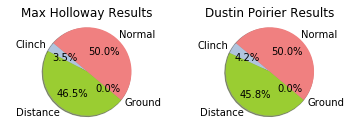

In [35]:
plt.subplot(221)
plt.title('Max Holloway Results')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_HClinch,Results_HDistance,Results_HGround,Results_HNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Dustin Poirier Results')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_PClinch,Results_PDistance,Results_PGround,Results_PNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Kelvin Gastelum (16-3-0) vs Israel Adesanya (16-0-0) : Result

<function matplotlib.pyplot.show(*args, **kw)>

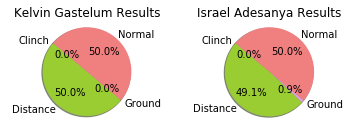

In [36]:
plt.subplot(221)
plt.title('Kelvin Gastelum Results')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_GClinch, Results_GDistance, Results_GGround, Results_GNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Israel Adesanya Results')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_AClinch, Results_ADistance, Results_AGround, Results_ANormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Eryk Anders (11-3-0) vs Khalil Rountree Jr. (7-3-0) : Result

<function matplotlib.pyplot.show(*args, **kw)>

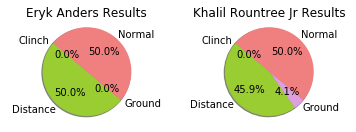

In [37]:
plt.subplot(221)
plt.title('Eryk Anders Results')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_AnClinch, Results_AnDistance, Results_AnGround, Results_AnNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Khalil Rountree Jr Results')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_RClinch, Results_RDistance, Results_RGround, Results_RNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Alan Jouban (16-6-0) vs Dwight Grant (9-2-0) ; Result

<function matplotlib.pyplot.show(*args, **kw)>

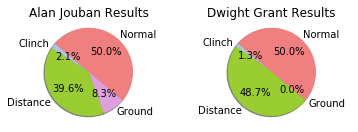

In [38]:
plt.subplot(221)
plt.title('Alan Jouban Results')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_JClinch, Results_JDistance, Results_JGround, Results_JNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Dwight Grant Results')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_GrClinch, Results_GrDistance, Results_GrGround, Results_GrNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

Ovince Saint Preux (23-12-0) vs Nikita Krylov (24-6-0) : Result

<function matplotlib.pyplot.show(*args, **kw)>

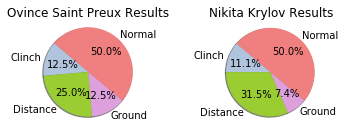

In [39]:
plt.subplot(221)
plt.title('Ovince Saint Preux Results')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_PrClinch, Results_PrDistance, Results_PrGround, Results_PrNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Nikita Krylov Results')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_KClinch, Results_KDistance, Results_KGround, Results_KNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

# Comparing Total vs Result

This section compares the results I found using the methods and made vs the results of UFC 236

## Max Holloway 

<function matplotlib.pyplot.show(*args, **kw)>

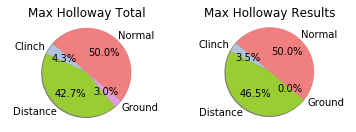

In [40]:
plt.subplot(221)
plt.title('Max Holloway Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [HClinch,HDistance,HGround,HNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Max Holloway Results')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_HClinch,Results_HDistance,Results_HGround,Results_HNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

## Dustin Poirier 

<function matplotlib.pyplot.show(*args, **kw)>

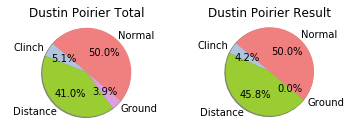

In [41]:
plt.subplot(221)
plt.title('Dustin Poirier Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [PClinch,PDistance,PGround,PNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Dustin Poirier Result')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_PClinch,Results_PDistance,Results_PGround,Results_PNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

## Kelvin Gastelum

<function matplotlib.pyplot.show(*args, **kw)>

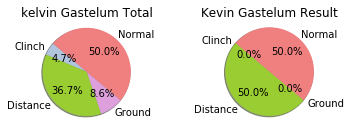

In [42]:
plt.subplot(221)
plt.title('kelvin Gastelum Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [GClinch, GDistance, GGround, GNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Kevin Gastelum Result')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_GClinch, Results_GDistance, Results_GGround, Results_GNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

## Israel Adesanya

<function matplotlib.pyplot.show(*args, **kw)>

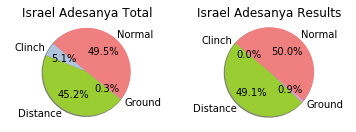

In [43]:
plt.subplot(221)
plt.title('Israel Adesanya Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [AClinch, ADistance, AGround, ANormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Israel Adesanya Results')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_AClinch, Results_ADistance, Results_AGround, Results_ANormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

## Eryk Anders

<function matplotlib.pyplot.show(*args, **kw)>

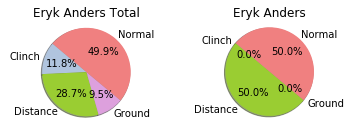

In [44]:
plt.subplot(221)
plt.title('Eryk Anders Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [AnClinch, AnDistance, AnGround, AnNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Eryk Anders')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_AnClinch, Results_AnDistance, Results_AnGround, Results_AnNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

## Khalil Rountree Jr.

<function matplotlib.pyplot.show(*args, **kw)>

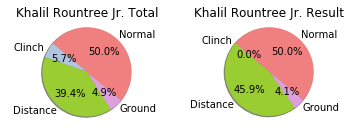

In [45]:
plt.subplot(221)
plt.title('Khalil Rountree Jr. Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [RClinch, RDistance, RGround, RNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Khalil Rountree Jr. Result')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_RClinch, Results_RDistance, Results_RGround, Results_RNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

## Alan Jouban

<function matplotlib.pyplot.show(*args, **kw)>

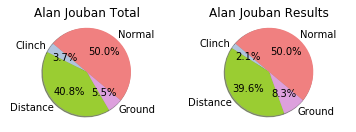

In [46]:
plt.subplot(221)
plt.title('Alan Jouban Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [JClinch, JDistance, JGround, JNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Alan Jouban Results')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_JClinch, Results_JDistance, Results_JGround, Results_JNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

## Dwight Grant

<function matplotlib.pyplot.show(*args, **kw)>

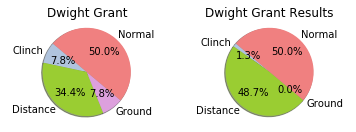

In [47]:
plt.subplot(221)
plt.title('Dwight Grant')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [GrClinch, GrDistance, GrGround, GrNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Dwight Grant Results')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_GrClinch, Results_GrDistance, Results_GrGround, Results_GrNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

## Ovince Saint Preux

<function matplotlib.pyplot.show(*args, **kw)>

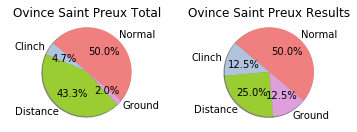

In [48]:
plt.subplot(221)
plt.title('Ovince Saint Preux Total')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [PrClinch, PrDistance, PrGround, PrNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Ovince Saint Preux Results')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_PrClinch, Results_PrDistance, Results_PrGround, Results_PrNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show

## Nikita Krylov

<function matplotlib.pyplot.show(*args, **kw)>

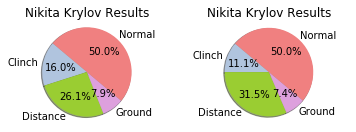

In [49]:
plt.subplot(221)
plt.title('Nikita Krylov Results')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [KClinch, KDistance, KGround, KNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.subplot(222)
plt.title('Nikita Krylov Results')
labels = 'Clinch','Distance','Ground','Normal'
sizes = [Results_KClinch, Results_KDistance, Results_KGround, Results_KNormal]
colors = ['lightsteelblue', 'yellowgreen', 'plum', 'lightcoral']
explode = (0, 0, 0, 0) 
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

plt.figure(1)



plt.show